In [ ]:
#kết nối với gg drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import thư viện
import numpy as np
from tensorflow import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K
import pickle
import matplotlib.pyplot as plt


In [ ]:
#load feature đã xử lý và resize từ trước
pickle_in = open("gdrive/MyDrive/gender/X_gender.pickle","rb")
x = pickle.load(pickle_in)

In [ ]:
#load feature đã xử lý và resize từ trước
pickle_in = open("gdrive/MyDrive/gender/y_gender.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
x.shape

(23708, 200, 200, 3)

In [ ]:
y.shape

(23708,)

1

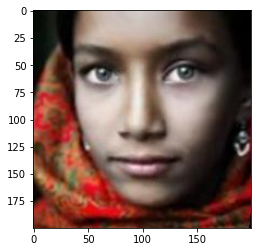

In [ ]:
plt.imshow(x[0])
y[0]

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(252,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 64)     

In [ ]:
hist = model.fit(x, y,batch_size=32,epochs=50,verbose=1,validation_split=(0.1))

Epoch 1/50
667/667 [==============================] - 113s 145ms/step - loss: 0.5447 - accuracy: 0.7466 - val_loss: 0.3774 - val_accuracy: 0.8288
Epoch 2/50
667/667 [==============================] - 96s 144ms/step - loss: 0.3360 - accuracy: 0.8505 - val_loss: 0.4178 - val_accuracy: 0.7832
Epoch 3/50
667/667 [==============================] - 96s 144ms/step - loss: 0.2858 - accuracy: 0.8746 - val_loss: 0.2954 - val_accuracy: 0.8693
Epoch 4/50
667/667 [==============================] - 96s 144ms/step - loss: 0.2508 - accuracy: 0.8910 - val_loss: 0.2781 - val_accuracy: 0.8802
Epoch 5/50
667/667 [==============================] - 96s 144ms/step - loss: 0.2306 - accuracy: 0.9021 - val_loss: 0.2558 - val_accuracy: 0.8912
Epoch 6/50
667/667 [==============================] - 96s 144ms/step - loss: 0.2331 - accuracy: 0.8990 - val_loss: 0.2789 - val_accuracy: 0.8752
Epoch 7/50
667/667 [==============================] - 96s 144ms/step - loss: 0.2034 - accuracy: 0.9117 - val_loss: 0.2587 - val_a

In [ ]:
#model.save('gdrive/MyDrive/age/saved_model/deadline_linear.h5')
model.save('gender.h5')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))	
	
	return img

[[0.9670875]]
female


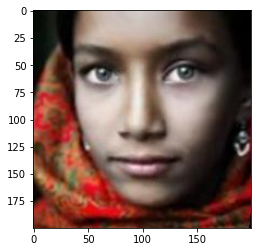

In [ ]:
#test ket qua theo kiểu linear
#nho chuyển y về lại integer


	# load model
plt.imshow(x[0])
model = load_model('gender.h5')
	# predict the class
img = img_to_array(x[0])

img = img.reshape(1,200,200,3)  
result = model.predict(img)
print(result)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')


male


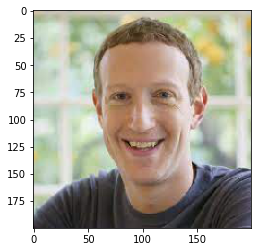

In [ ]:
img = load_image('mark.jpg')

plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')


female
[[0.99967134]]


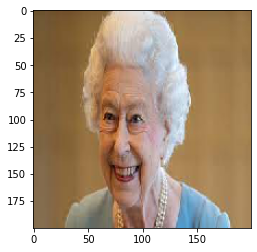

In [ ]:
img = load_image('queen.jfif')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')
print(result)  

male
[[0.02568404]]


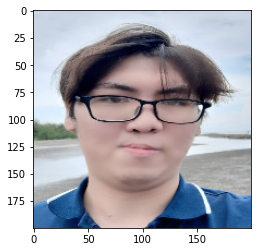

In [ ]:
img = load_image('thanh2.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')
print(result) 

male
[[0.48295352]]


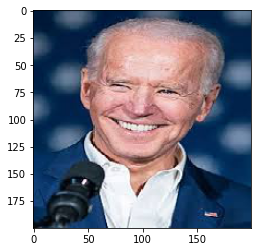

In [ ]:
img = load_image('joe2.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')
print(result) 

male
[[0.00673442]]


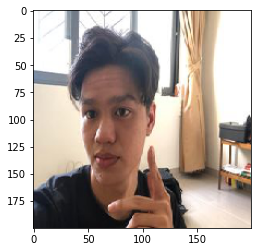

In [ ]:
img = load_image('ming.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')
print(result) 

female
[[0.9980172]]


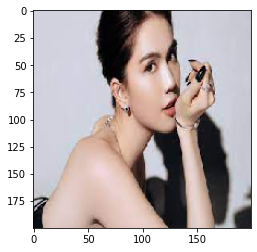

In [ ]:
img = load_image('ngoctrinh.jfif')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')
print(result) 

male
[[2.3027935e-06]]


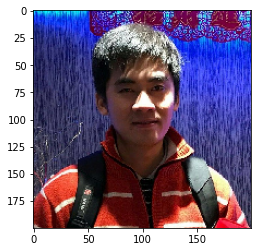

In [ ]:
img = load_image('tho.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')
print(result) 

female
[[0.98984843]]


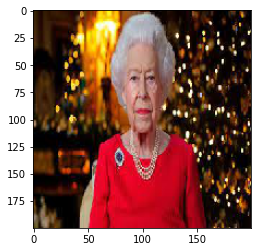

In [ ]:
img = load_image('queen2.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')
print(result) 

male
[[0.0058156]]


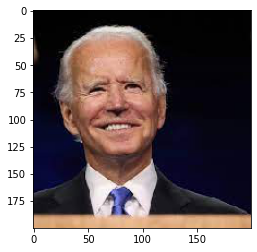

In [ ]:
img = load_image('joe1.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
#img = cv2.GaussianBlur(img,(37,37),0,0)
#img = cv2.filter2D(img,-1,kernel)
img = img.reshape(1,200,200,3)  
result = model.predict(img)
if (float(result)<0.5):
  print('male')
elif(float(result)>0.5):
  print('female')
print(result) 